## load data

In [80]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

#from library.sb_utils import save_file

In [81]:
wine_df = pd.read_csv("../data/wine_df_cleaned.csv") #, index_col = "wine_type"
wine_df.head()
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_type             5320 non-null   object 
 1   fixed_acidity         5320 non-null   float64
 2   volatile_acidity      5320 non-null   float64
 3   citric_acid           5320 non-null   float64
 4   residual_sugar        5320 non-null   float64
 5   chlorides             5320 non-null   float64
 6   free_sulfur_dioxide   5320 non-null   float64
 7   total_sulfur_dioxide  5320 non-null   float64
 8   density               5320 non-null   float64
 9   pH                    5320 non-null   float64
 10  sulphates             5320 non-null   float64
 11  alcohol               5320 non-null   float64
 12  quality               5320 non-null   int64  
 13  free_SO2_ratio        5320 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 582.0+ KB


In [82]:
wine_df["quality"] = wine_df["quality"].astype("category")
print(wine_df["quality"].dtypes)

category


In [83]:
# Call the .corr() method on the wine dataset 
wine_df.corr(method ="pearson", numeric_only = True)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,free_SO2_ratio
fixed_acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,0.112093
volatile_acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,0.182729
citric_acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,-0.141871
residual_sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.120143
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,0.165076
free_sulfur_dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.252406
total_sulfur_dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.379358
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,0.097300
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.184696
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.192480


## Visualizing correlations

C:\Users\Yan Zhang\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


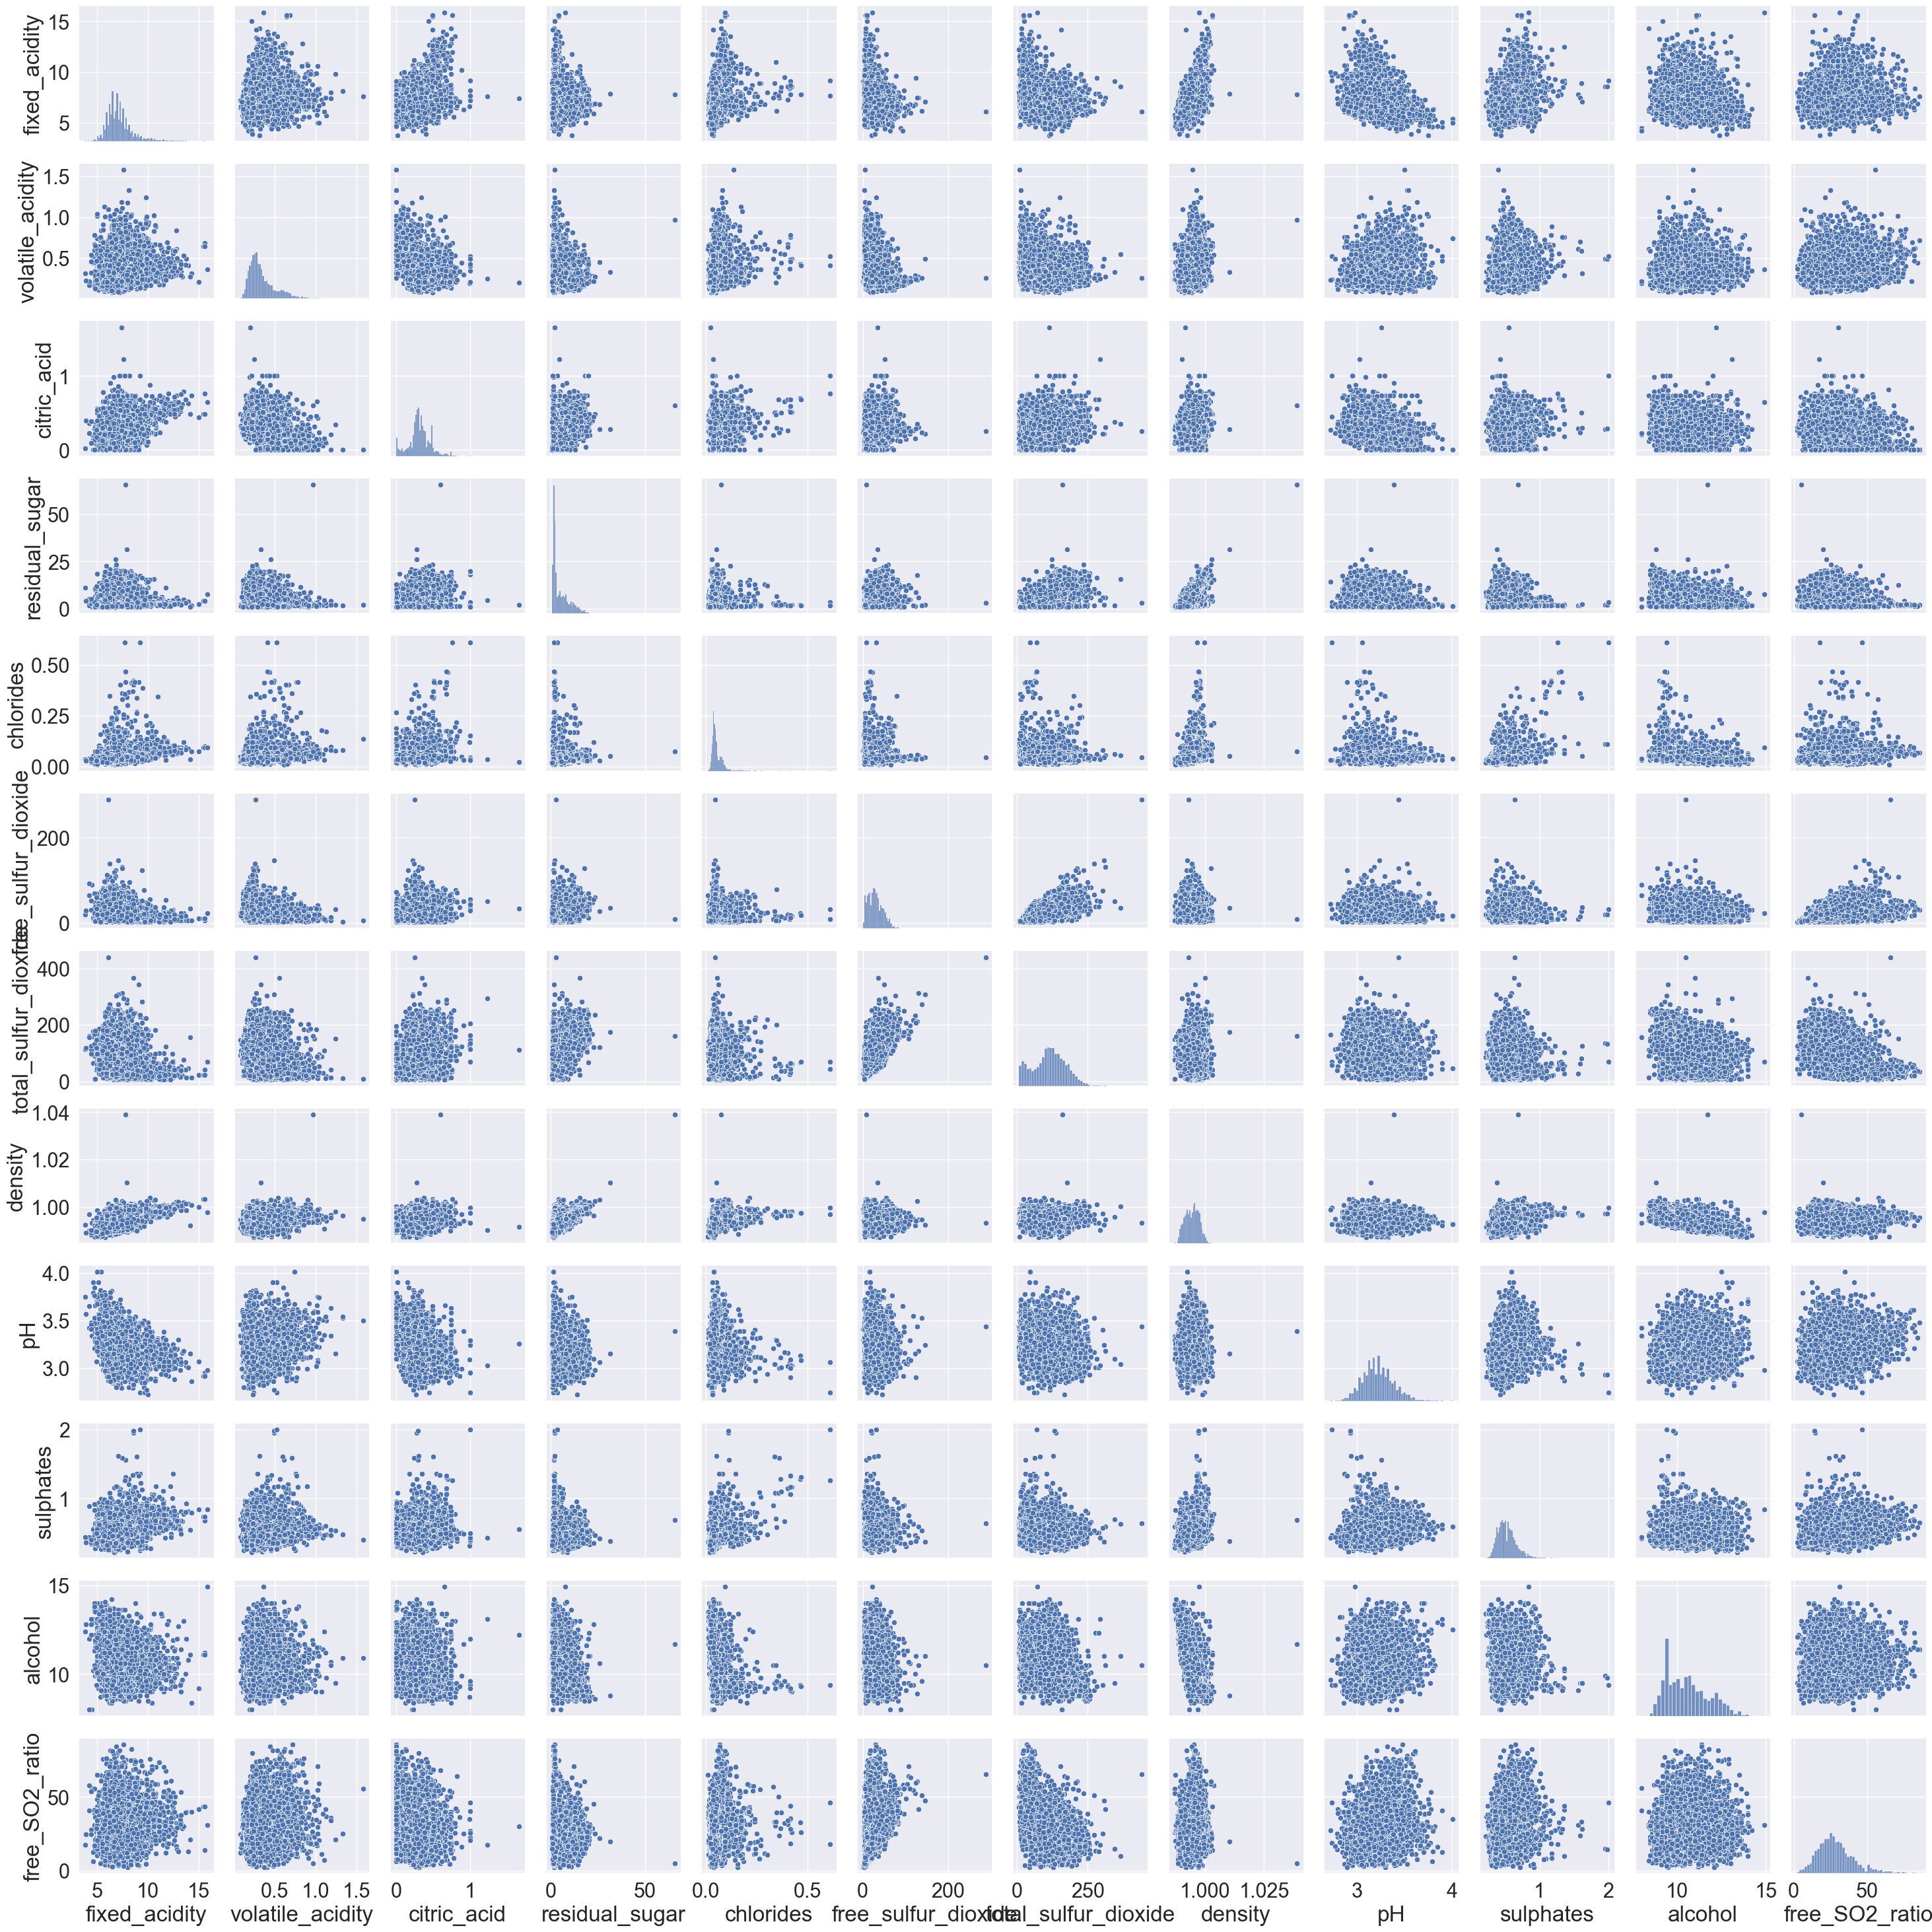

In [84]:
# Make a pairplot of the wine data
sns.set(font_scale=2.0)
sns.pairplot(wine_df)

<Axes: >

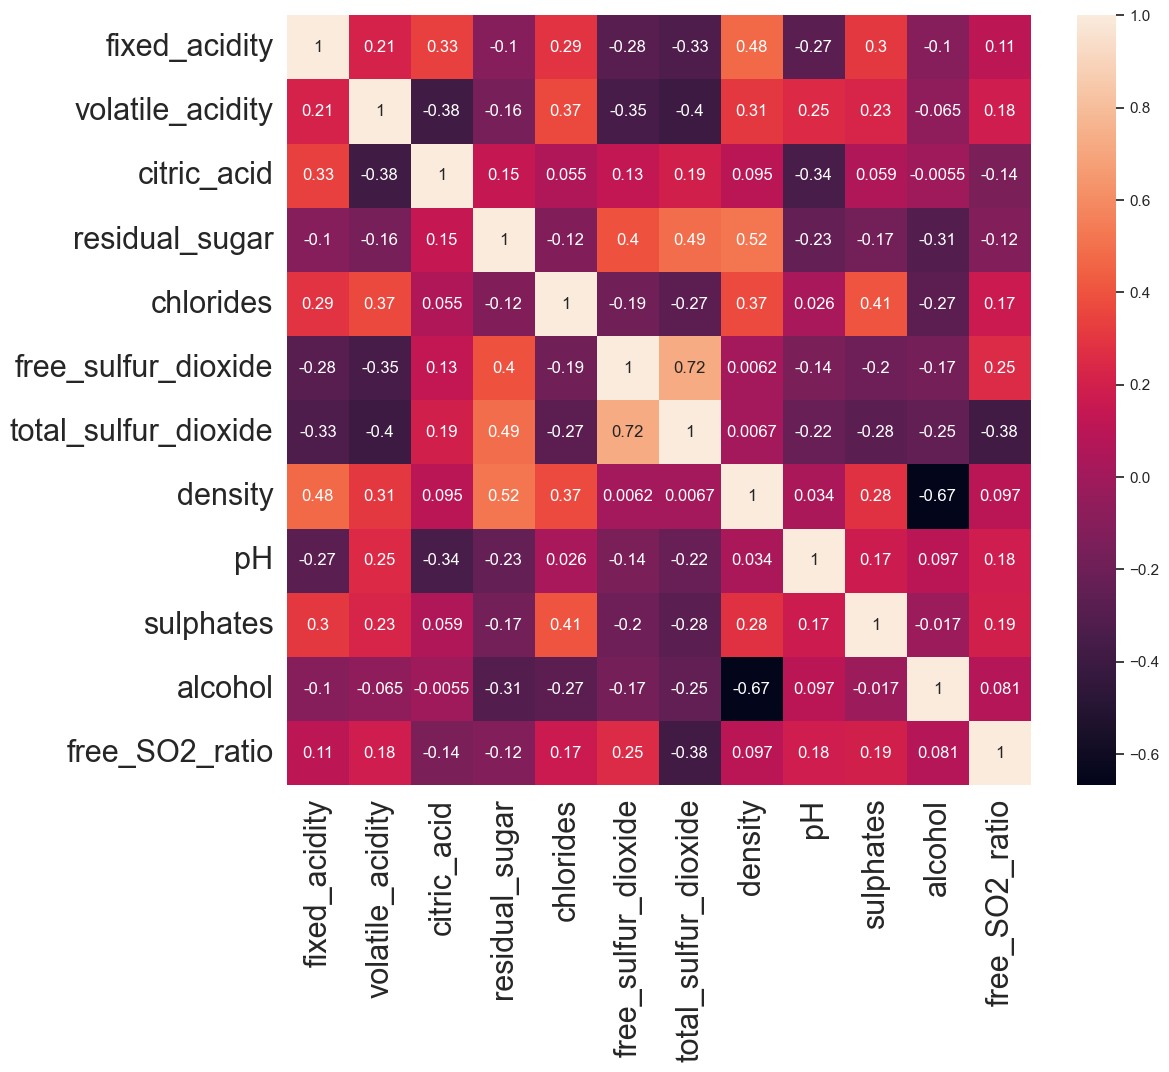

In [85]:
plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.0)
sns.heatmap(wine_df.corr(numeric_only=True), annot = True)

The  density vs residual_sugar,density vs chlorides, density vs fixed_acidity, totol_sulfur_dioxide vs residual_sugar, free_sulfur_dioxide vs residual_sugar shows strong positive correlation.
density vs alcohol, citric_acid vs voltalie_acitity, total_sulfur_dioxide vs volatile_acidity shows negative correlation.

## Feature engineering

In high quality wine,  the alcohol, sugar and acidity are balanced. based on this, new columns of alcohol/sugar ratio, 
sugar/acidity ratio. The fixed_acidity percentage will also be added because of its impact on pH.

In [86]:
wine_df[
    "alcohol_surgar_ratio"] = 100 * wine_df.alcohol/ wine_df.residual_sugar
wine_df["sugar_acidity_ratio"]=100 * wine_df.residual_sugar/(wine_df.fixed_acidity + wine_df.volatile_acidity)
wine_df[
    "fixed_acidity_ratio"] = 100 * wine_df.fixed_acidity/ (wine_df.fixed_acidity + wine_df.volatile_acidity)
wine_df.head()

,wine_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,free_SO2_ratio,alcohol_surgar_ratio,sugar_acidity_ratio,fixed_acidity_ratio
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,32.352941,494.736842,23.456790,91.358025
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,37.313433,376.923077,29.953917,89.861751
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,27.777778,426.086957,26.869159,91.121495
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,28.333333,515.789474,16.550523,97.560976
4,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,32.500000,522.222222,22.332506,91.811414


<Axes: xlabel='quality', ylabel='fixed_acidity'>

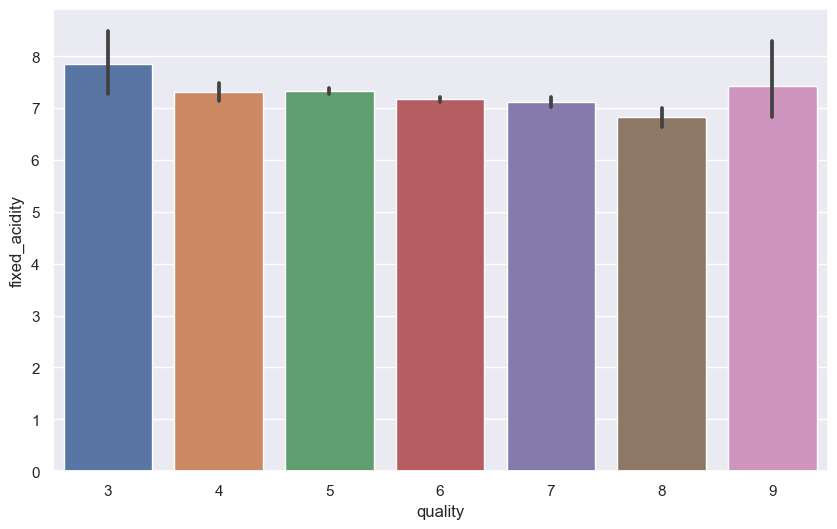

In [87]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "fixed_acidity", data = wine_df)

<Axes: xlabel='quality', ylabel='residual_sugar'>

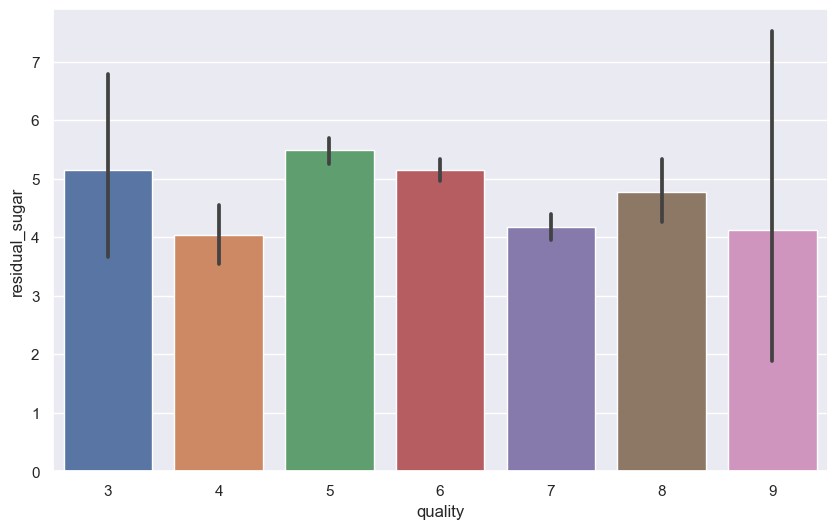

In [88]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "residual_sugar", data = wine_df)

the high quality wine seems have less 5 sugar level.

<Axes: xlabel='quality', ylabel='alcohol'>

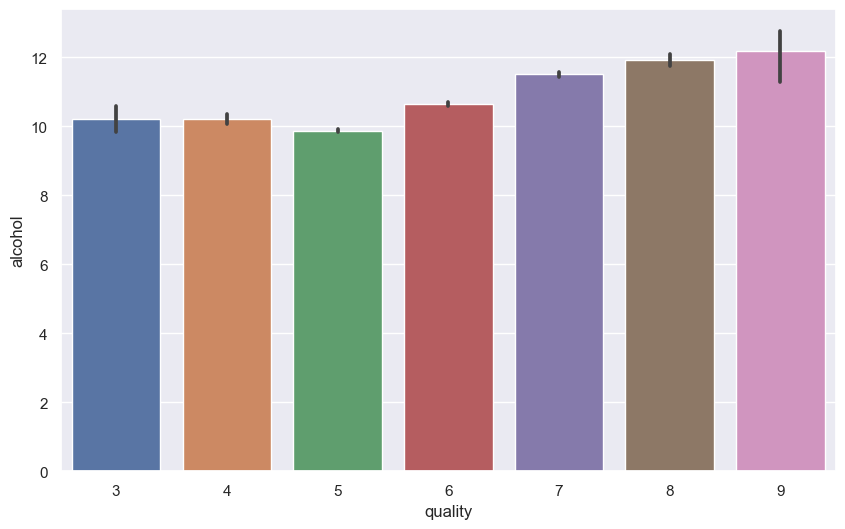

In [90]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "alcohol", data = wine_df)

<Axes: xlabel='quality', ylabel='density'>

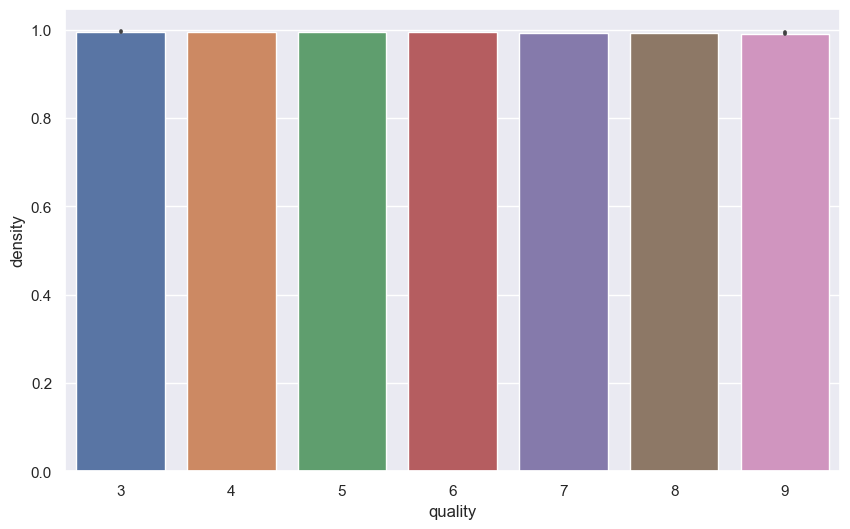

In [91]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "density", data = wine_df)

<Axes: xlabel='quality', ylabel='chlorides'>

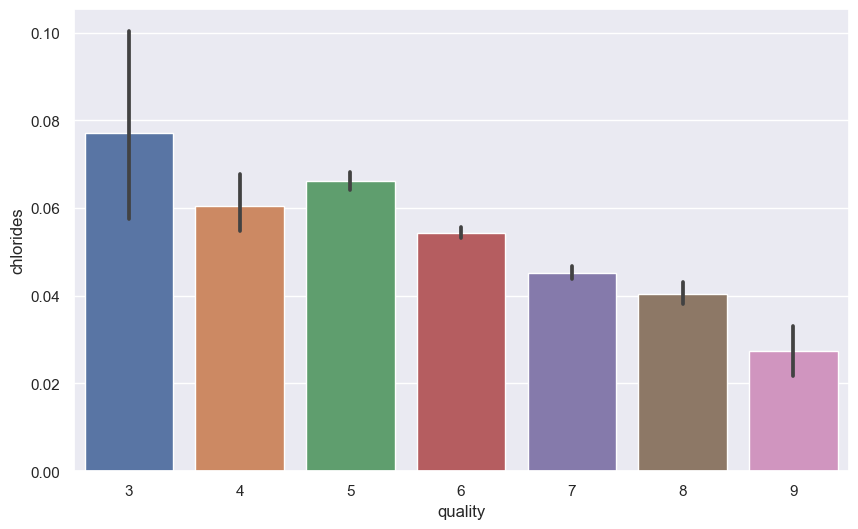

In [92]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "chlorides", data = wine_df)

## save data

In [93]:
import os

outname = 'wine_df_eda.csv'

outdir = '../data/'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)

wine_df.to_csv(fullname)

In [94]:
wine_df_eda= pd.read_csv("../data/wine_df_eda.csv", index_col = "wine_type")
wine_df_eda

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,free_SO2_ratio,alcohol_surgar_ratio,sugar_acidity_ratio,fixed_acidity_ratio
wine_type,,,,,,,,,,,,,,,,,
red,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,32.352941,494.736842,23.456790,91.358025
red,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,37.313433,376.923077,29.953917,89.861751
red,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,27.777778,426.086957,26.869159,91.121495
red,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,28.333333,515.789474,16.550523,97.560976
red,4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,32.500000,522.222222,22.332506,91.811414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white,5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,26.086957,700.000000,24.960998,96.723869
white,5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,33.928571,120.000000,115.606936,95.375723
white,5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,27.027027,783.333333,17.804154,96.439169


## summary 


Among the features, density vs residual_sugar,density vs chlorides, density vs fixed_acidity shows strong positive correlation.
density vs alcohol shows negative correlation
based on the data exploring, all features should be keep for further modeling since the quality to each feature is not clear.